In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd

In [2]:
df=pd.read_csv(r'C:\Users\Aeriu\Desktop\country_vaccinations.csv')

Profiling and assessing nulls

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              7337 non-null   object 
 1   iso_code                             7337 non-null   object 
 2   date                                 7337 non-null   object 
 3   total_vaccinations                   4552 non-null   float64
 4   people_vaccinated                    4053 non-null   float64
 5   people_fully_vaccinated              2749 non-null   float64
 6   daily_vaccinations_raw               3830 non-null   float64
 7   daily_vaccinations                   7150 non-null   float64
 8   total_vaccinations_per_hundred       4552 non-null   float64
 9   people_vaccinated_per_hundred        4053 non-null   float64
 10  people_fully_vaccinated_per_hundred  2749 non-null   float64
 11  daily_vaccinations_per_million

In [4]:
df.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     2785
people_vaccinated                      3284
people_fully_vaccinated                4588
daily_vaccinations_raw                 3507
daily_vaccinations                      187
total_vaccinations_per_hundred         2785
people_vaccinated_per_hundred          3284
people_fully_vaccinated_per_hundred    4588
daily_vaccinations_per_million          187
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [5]:
#too many null values; need to impute
df=df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              7337 non-null   object 
 1   iso_code                             7337 non-null   object 
 2   date                                 7337 non-null   object 
 3   total_vaccinations                   7337 non-null   float64
 4   people_vaccinated                    7337 non-null   float64
 5   people_fully_vaccinated              7337 non-null   float64
 6   daily_vaccinations_raw               7337 non-null   float64
 7   daily_vaccinations                   7337 non-null   float64
 8   total_vaccinations_per_hundred       7337 non-null   float64
 9   people_vaccinated_per_hundred        7337 non-null   float64
 10  people_fully_vaccinated_per_hundred  7337 non-null   float64
 11  daily_vaccinations_per_million

In [6]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,7.337000e+03,7.337000e+03,7.337000e+03,7.337000e+03,7.337000e+03,7337.000000,7337.000000,7337.000000,7337.000000
mean,1.464880e+06,1.059844e+06,2.997230e+05,4.564538e+04,5.676677e+04,5.831015,3.998187,1.259415,2607.431239
std,6.731361e+06,4.741589e+06,2.014937e+06,1.994123e+05,1.968880e+05,14.142185,9.352319,4.733655,4196.236212
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.460000e+02,0.000000,0.000000,0.000000,321.000000
50%,2.312600e+04,7.017000e+03,0.000000e+00,9.600000e+01,5.501000e+03,0.400000,0.090000,0.000000,1192.000000
75%,4.729980e+05,2.935720e+05,3.131400e+04,1.513700e+04,2.509500e+04,5.240000,3.510000,0.690000,2933.000000
max,1.183138e+08,7.723006e+07,4.193463e+07,4.575496e+06,2.541597e+06,151.860000,88.790000,63.070000,54264.000000


calculating average data by country

In [7]:
df['date']=pd.to_datetime(df['date'])
df.groupby('country').agg(['mean'])
df.groupby('country').agg([np.mean])

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
,mean,mean,mean,mean,mean,mean,mean,mean,mean
country,,,,,,,,,
Afghanistan,2704.347826,2704.347826,0.000000,0.000000,2152.565217,0.006957,0.006957,0.000000,55.521739
Albania,2087.074627,216.432836,34.567164,43.238806,415.731343,0.072687,0.007463,0.001194,144.417910
Algeria,3410.454545,0.000000,0.000000,1.363636,3139.545455,0.007727,0.000000,0.000000,71.272727
Andorra,446.822222,336.555556,54.133333,0.000000,74.600000,0.578222,0.435556,0.070222,965.466667
Angola,3940.642857,3940.642857,0.000000,0.000000,3069.357143,0.012143,0.012143,0.000000,93.428571
...,...,...,...,...,...,...,...,...,...
Uruguay,130906.809524,130906.809524,0.000000,14166.380952,12194.619048,3.767619,3.767619,0.000000,3510.476190
Venezuela,771.937500,771.937500,0.000000,0.000000,544.000000,0.002500,0.002500,0.000000,19.062500


Calculating % change of average global vaccinations per day
 and visualizing % change in daily vaccinations of a country over time

<AxesSubplot:xlabel='date', ylabel='daily_pct_change'>

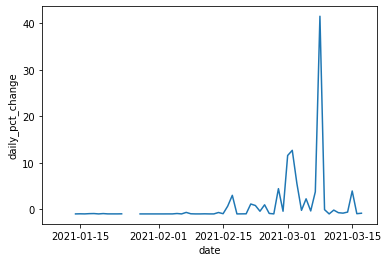

In [8]:
df_ordered=df.sort_values(['date'])
df_ordered['daily_pct_change']=df_ordered['daily_vaccinations'].pct_change()
df_albania=df_ordered.loc[df_ordered['country'] == 'Albania']
sns.lineplot(data=df_albania,x='date',y='daily_pct_change')

Visualizing # of daily vaccinations in a country over time

<AxesSubplot:xlabel='date', ylabel='daily_vaccinations'>

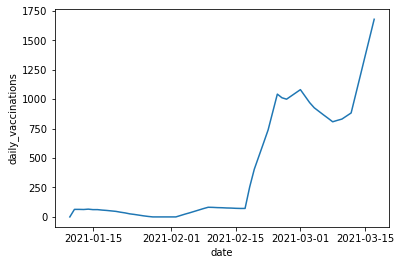

In [9]:
sns.lineplot(data=df_albania,x='date',y='daily_vaccinations')

Calculating 7 day average of daily vaccinations grouped by country

In [10]:
df_ordered=df_ordered.sort_values(by=['country','date'],ascending=[True,True])
df_ordered['7_day_avg']=df_ordered['daily_vaccinations'].rolling(7).mean()

In [11]:
df_ordered.head(15)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,daily_pct_change,7_day_avg
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,-1.000000,NaN
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,-0.985163,NaN
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,-0.950550,NaN
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,-0.884378,NaN
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,17.226667,NaN
5,Afghanistan,AFG,2021-02-27,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,-0.862322,NaN
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,0.02,0.02,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,-0.391633,1171.714286
7,Afghanistan,AFG,2021-03-01,0.0,0.0,0.0,0.0,1580.0,0.00,0.00,0.0,41.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,1.888483,1397.428571
8,Afghanistan,AFG,2021-03-02,0.0,0.0,0.0,0.0,1794.0,0.00,0.00,0.0,46.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,-0.995326,1458.428571
9,Afghanistan,AFG,2021-03-03,0.0,0.0,0.0,0.0,2008.0,0.00,0.00,0.0,52.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,-0.988263,1550.000000


In [12]:
 (df_ordered['daily_vaccinations'].iloc[1:8].sum())/7 #checking if it actually worked correctly

1397.4285714285713

Combining datasets with geo file from geopandas

In [13]:
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
dfm= world.merge(df_ordered,left_on='iso_a3',right_on='iso_code') #left join iso a3 right join iso code
dfm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5468 entries, 0 to 5467
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   pop_est                              5468 non-null   int64         
 1   continent                            5468 non-null   object        
 2   name                                 5468 non-null   object        
 3   iso_a3                               5468 non-null   object        
 4   gdp_md_est                           5468 non-null   float64       
 5   geometry                             5468 non-null   geometry      
 6   country                              5468 non-null   object        
 7   iso_code                             5468 non-null   object        
 8   date                                 5468 non-null   datetime64[ns]
 9   total_vaccinations                   5468 non-null   float64       
 10  peop

Visualizing total vaccinations by country

<AxesSubplot:title={'center':'total vaccinations by country'}>

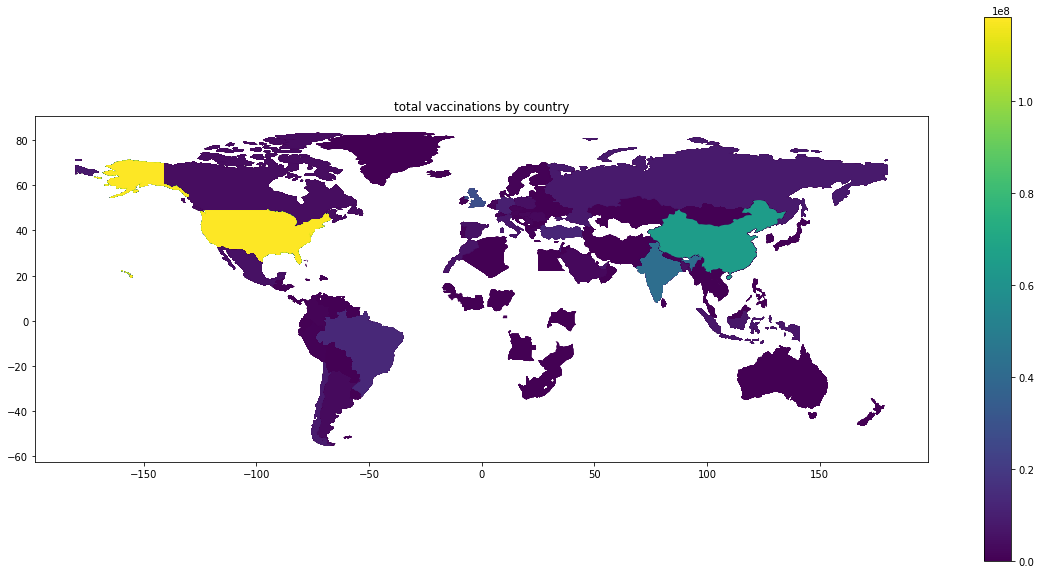

In [14]:
fig, ax=plt.subplots(1, figsize=(20,10))
ax.set_title('total vaccinations by country')
dfm.plot(column='total_vaccinations',ax=ax,figsize=(20,10),legend=True)

In [15]:

dfmsum=dfm.groupby('country').sum()
dfmsum.reset_index()


,country,pop_est,gdp_md_est,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,daily_pct_change,7_day_avg
0,Afghanistan,784870653,1.473840e+06,6.220000e+04,6.220000e+04,0.000000e+00,0.0,49509.0,0.16,0.16,0.00,1277.0,34.277011,3.799371e+04
1,Albania,204215129,2.271300e+06,1.398340e+05,1.450100e+04,2.316000e+03,2897.0,27854.0,4.87,0.50,0.08,9676.0,inf,3.219886e+04
2,Algeria,901327746,1.340680e+07,7.503000e+04,0.000000e+00,0.000000e+00,30.0,69070.0,0.17,0.00,0.00,1568.0,inf,6.206714e+04
3,Angola,410343822,2.646000e+06,5.516900e+04,5.516900e+04,0.000000e+00,0.0,42971.0,0.17,0.17,0.00,1308.0,56.092542,3.081714e+04
4,Argentina,3587756733,7.123140e+07,5.507725e+07,4.122922e+07,1.330059e+07,2465406.0,2613362.0,121.87,91.23,29.45,57824.0,inf,2.242586e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,United States,29396321190,1.670400e+09,3.647529e+09,2.548824e+09,1.068316e+09,105744960.0,111227630.0,1090.63,762.16,319.41,332579.0,inf,1.051642e+08
109,Uruguay,70563108,1.538250e+06,2.749043e+06,2.749043e+06,0.000000e+00,297494.0,256087.0,79.12,79.12,0.00,73720.0,805.847602,7.598297e+06
110,Venezuela,500864256,7.497600e+06,1.235100e+04,1.235100e+04,0.000000e+00,0.0,8704.0,0.04,0.04,0.00,305.0,-8.164408,4.744929e+04
111,Vietnam,1250082119,7.733700e+06,1.494640e+05,1.494640e+05,0.000000e+00,30971.0,21513.0,0.15,0.15,0.00,222.0,inf,1.523986e+04


In [16]:
dfmsum.head()

,pop_est,gdp_md_est,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,daily_pct_change,7_day_avg
country,,,,,,,,,,,,,
Afghanistan,784870653,1473840.0,62200.0,62200.0,0.0,0.0,49509.0,0.16,0.16,0.00,1277.0,34.277011,3.799371e+04
Albania,204215129,2271300.0,139834.0,14501.0,2316.0,2897.0,27854.0,4.87,0.50,0.08,9676.0,inf,3.219886e+04
Algeria,901327746,13406800.0,75030.0,0.0,0.0,30.0,69070.0,0.17,0.00,0.00,1568.0,inf,6.206714e+04
Angola,410343822,2646000.0,55169.0,55169.0,0.0,0.0,42971.0,0.17,0.17,0.00,1308.0,56.092542,3.081714e+04
Argentina,3587756733,71231400.0,55077250.0,41229217.0,13300587.0,2465406.0,2613362.0,121.87,91.23,29.45,57824.0,inf,2.242586e+06


In [17]:
dfm['daily_vac_sum'] = dfm.groupby('country')['daily_vaccinations'].transform('sum')
dfm['pct_pop_vac'] = dfm['daily_vac_sum']/dfm['pop_est']
dfm.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,iso_code,date,total_vaccinations,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,daily_pct_change,7_day_avg,daily_vac_sum,pct_pop_vac
0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,2020-12-14,5.0,...,0.0,0.0,0.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html,NaN,10731.142857,3303660.0,0.092738
1,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,2020-12-15,723.0,...,0.0,0.0,19.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html,-0.596175,9426.714286,3303660.0,0.092738
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,2020-12-16,3023.0,...,0.0,0.0,40.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html,-0.331413,8002.428571,3303660.0,0.092738
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,2020-12-17,7202.0,...,0.0,0.0,64.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html,-0.987205,6520.857143,3303660.0,0.092738
4,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,2020-12-18,11174.0,...,0.0,0.0,74.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html,0.237040,4981.571429,3303660.0,0.092738


<AxesSubplot:title={'center':'% of population vaccinated by country'}>

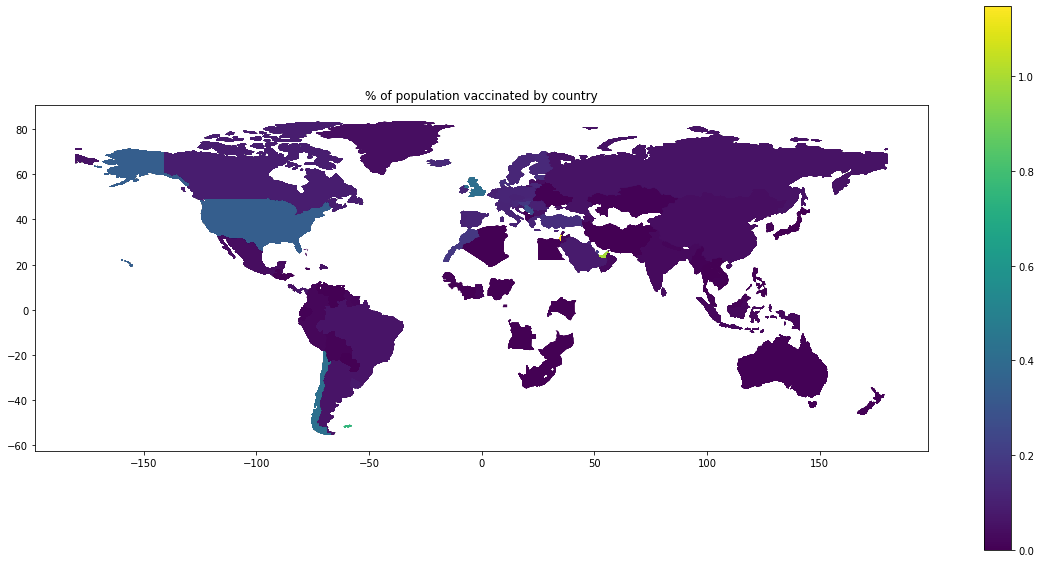

In [18]:
fig, ax=plt.subplots(1, figsize=(20,10))
ax.set_title('% of population vaccinated by country')
dfm.plot(column='pct_pop_vac',ax=ax,figsize=(20,10),legend=True)

Correlation between Country's GDP Per Capita and % of population currently vaccinated

<AxesSubplot:xlabel='GDP_Per_Cap', ylabel='pct_pop_vac'>

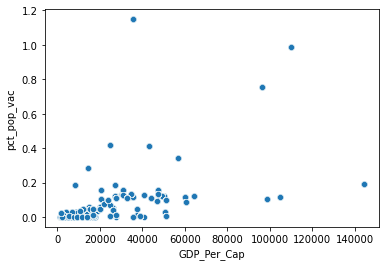

In [19]:
dfm['GDP_Per_Cap']=dfm['gdp_md_est']/dfm['pop_est']
dfm['GDP_Per_Cap']=dfm['GDP_Per_Cap']*1000000
sns.scatterplot(data=dfm,x='GDP_Per_Cap',y='pct_pop_vac')

We can see that the vast majority of low gdp per countries also have a low percentage of their population vaccinated

Checking correlation between gdp per capita and percentage of population vaccinated

In [20]:
dfm['GDP_Per_Cap'].corr(dfm['pct_pop_vac'])

0.38677739536614947

pearson coefficient describes low positive correlation between the values

visualizing correlation between all values

<AxesSubplot:>

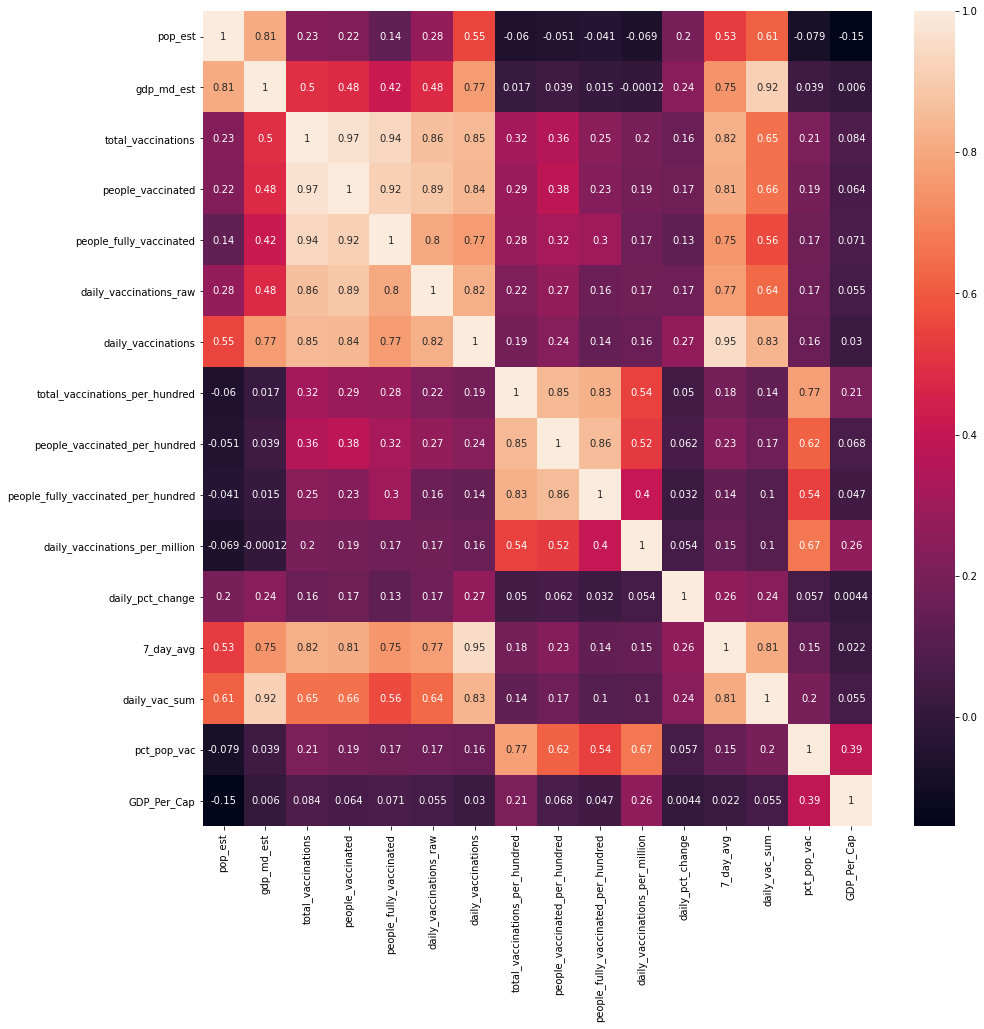

In [21]:
plt.subplots(figsize=(15,15))
sns.heatmap(dfm.corr(),annot=True)